In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# Print a success message
print("Pandas, sklearn, and matplotlib libraries are imported successfully.")

Matplotlib is building the font cache; this may take a moment.


Pandas, sklearn, and matplotlib libraries are imported successfully.


In [3]:
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
diabetes = load_diabetes()

In [4]:
# Create a Pandas DataFrame from the dataset
df_diabetes = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Print the first few rows of the DataFrame
print(df_diabetes.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training/validation (90%) and testing (10%) subsets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.10, random_state=42
)


# Print the shapes of the subsets
print(f"Training/validation data shape: {X_train_val.shape}")
print(f"Testing data shape: {X_test.shape}")


Training/validation data shape: (397, 10)
Testing data shape: (45, 10)


In [8]:
# Save the training and validation subset to a CSV file
training_validation_subset = df_diabetes.sample(frac=0.9, random_state=42)
training_validation_subset.to_csv("training_validation_subset.csv", index=False)

# Print a success message
print("The training and validation subset has been saved to training_validation_subset.csv")


The training and validation subset has been saved to training_validation_subset.csv


##The following is separate.

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


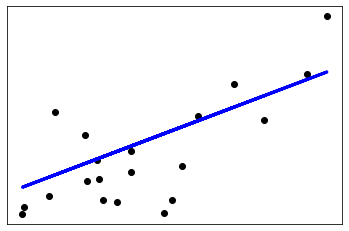

In [10]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()